In [20]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
Adding_Hidden_Layer=Dense(encoding_dim, activation= 'relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(Adding_Hidden_Layer)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 3s 11ms/step - loss: 0.4995 - accuracy: 0.0037 - val_loss: 0.3346 - val_accuracy: 0.0106
Epoch 2/5
235/235 [==============================] - 3s 11ms/step - loss: 0.3264 - accuracy: 0.0115 - val_loss: 0.3151 - val_accuracy: 0.0114
Epoch 3/5
235/235 [==============================] - 3s 11ms/step - loss: 0.3093 - accuracy: 0.0135 - val_loss: 0.3065 - val_accuracy: 0.0145
Epoch 4/5
235/235 [==============================] - 3s 11ms/step - loss: 0.3037 - accuracy: 0.0149 - val_loss: 0.3027 - val_accuracy: 0.0174
Epoch 5/5
235/235 [==============================] - 3s 11ms/step - loss: 0.2999 - accuracy: 0.0155 - val_loss: 0.3001 - val_accuracy: 0.0190


In [21]:
#adding noise factor
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [22]:
#Fitting the model
history=autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3133 - accuracy: 0.0132 - val_loss: 0.2807 - val_accuracy: 0.0095
Epoch 2/10
235/235 [==============================] - 2s 11ms/step - loss: 0.3081 - accuracy: 0.0137 - val_loss: 0.2782 - val_accuracy: 0.0090
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.3059 - accuracy: 0.0148 - val_loss: 0.2757 - val_accuracy: 0.0100
Epoch 4/10
235/235 [==============================] - 2s 11ms/step - loss: 0.3043 - accuracy: 0.0140 - val_loss: 0.2737 - val_accuracy: 0.0101
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3032 - accuracy: 0.0154 - val_loss: 0.2722 - val_accuracy: 0.0102
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3025 - accuracy: 0.0148 - val_loss: 0.2713 - val_accuracy: 0.0096
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3020 - accuracy: 0.0152 - val_loss: 0.2702 - val_accuracy: 0.0107

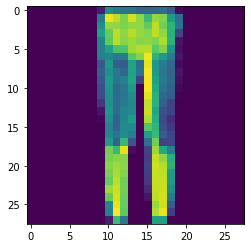

In [29]:
prediction = autoencoder.predict(x_test_noisy[[15],:])

from matplotlib import pyplot as plt
# Input the Image
plt.imshow(x_test[3].reshape(28,28))
plt.show()

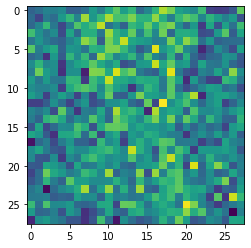

In [24]:
#after applying noise to data
plt.imshow(x_train_noisy[3].reshape(28,28))
plt.show()


In [25]:
prediction1 = autoencoder.predict(x_test_noisy)# Reconstructed the Image

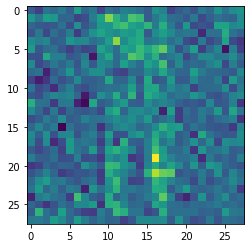

In [26]:
#After prediction of noise imge
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[3].reshape(28,28))
plt.show()

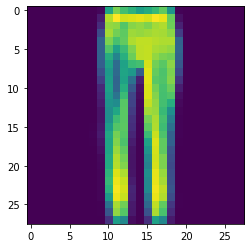

In [27]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction1[3].reshape(28,28))
plt.show()

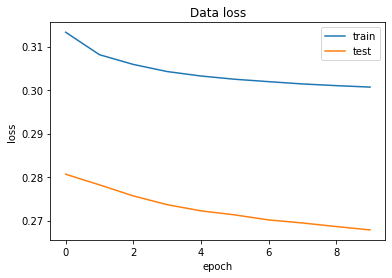

In [37]:
# Q4 plot loss and accuracy using the history object
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Data loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

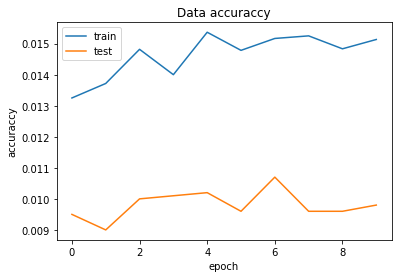

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Data accuraccy')
plt.xlabel('epoch')
plt.ylabel('accuraccy')
plt.legend(['train','test'])
plt.show()